In [ ]:
# As a feature: time, day, month?

# Predict volatility for EURUSD for 2 timeframes 1hour and 1day

In [101]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

%matplotlib inline

In [56]:
# Upload to memory minute by minute data for EURUSD and USDJPY


eur = pd.read_csv("/Users/john/Desktop/eurv1.csv", parse_dates=['time'], index_col=['time'], 
                  usecols= ['OpenMid', 'HighMid', 'LowMid', 'CloseMid', 'lowBid','highAsk','volume', 'time'])
jpy = pd.read_csv("/Users/john/Desktop/eurv1.csv", parse_dates=['time'], index_col=['time'], 
                  usecols= ['OpenMid', 'HighMid', 'LowMid', 'CloseMid', 'lowBid','highAsk','volume', 'time'])

In [57]:
# Resample EURUSD to 1 hour
eur1h = eur.resample('1H').agg({'OpenMid': 'first', 
                       'HighMid': 'max', 
                        'LowMid': 'min', 
                      'CloseMid': 'last',
                       'lowBid' : 'min',
                      'highAsk' : 'max',
                       'volume' : 'sum'})



In [70]:
eur1h.index

DatetimeIndex(['2014-01-01 22:00:00', '2014-01-01 23:00:00',
               '2014-01-02 00:00:00', '2014-01-02 01:00:00',
               '2014-01-02 02:00:00', '2014-01-02 03:00:00',
               '2014-01-02 04:00:00', '2014-01-02 05:00:00',
               '2014-01-02 06:00:00', '2014-01-02 07:00:00',
               ...
               '2017-08-31 14:00:00', '2017-08-31 15:00:00',
               '2017-08-31 16:00:00', '2017-08-31 17:00:00',
               '2017-08-31 18:00:00', '2017-08-31 19:00:00',
               '2017-08-31 20:00:00', '2017-08-31 21:00:00',
               '2017-08-31 22:00:00', '2017-08-31 23:00:00'],
              dtype='datetime64[ns]', name='time', length=32114, freq='H')

In [59]:
# Resample EURUSD to 1 day
eur1d = eur.resample('1D').agg({'OpenMid': 'first', 
                       'HighMid': 'max', 
                        'LowMid': 'min', 
                      'CloseMid': 'last',
                       'lowBid' : 'min',
                      'highAsk' : 'max',
                       'volume' : 'sum'})



In [60]:
eur1d.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2017-08-22', '2017-08-23', '2017-08-24', '2017-08-25',
               '2017-08-26', '2017-08-27', '2017-08-28', '2017-08-29',
               '2017-08-30', '2017-08-31'],
              dtype='datetime64[ns]', name='time', length=1339, freq='D')

In [61]:
# Resample USDJPY to 1 hour
jpy1h = jpy.resample('1H').agg({'OpenMid': 'first', 
                       'HighMid': 'max', 
                        'LowMid': 'min', 
                      'CloseMid': 'last',
                       'lowBid' : 'min',
                      'highAsk' : 'max',
                       'volume' : 'sum'})

In [62]:
# Resample USDJPY to 1 day
jpy1d = jpy.resample('1D').agg({'OpenMid': 'first', 
                       'HighMid': 'max', 
                        'LowMid': 'min', 
                      'CloseMid': 'last',
                       'lowBid' : 'min',
                      'highAsk' : 'max',
                       'volume' : 'sum'})

In [63]:
# Create a volatility Column - This is what i am trying to predict 

eur1h['Volatility'] = eur1h['highAsk'] - eur1h['lowBid']
jpy1h['Volatility'] = jpy1h['highAsk'] - jpy1h['lowBid']
eur1h['JPYvolavility'] = jpy1h['Volatility']
eur1h['JPYvolume'] = jpy1h['volume']

In [64]:
eur1d['Volatility'] = eur1d['highAsk'] - eur1d['lowBid']
jpy1d['Volatility'] = jpy1d['highAsk'] - jpy1d['lowBid']
eur1d['JPYvolavility'] = jpy1d['Volatility']
eur1d['JPYvolume'] = jpy1d['volume']

In [111]:
#eur1h.dropna(inplace=True)
#eur1d.dropna(inplace=True)

In [12]:
eur1h.head(3)

,OpenMid,HighMid,LowMid,CloseMid,lowBid,highAsk,volume,Volatility,JPYvolavility,JPYvolume
time,,,,,,,,,,
2014-01-01 22:00:00,1.375250,1.376695,1.374245,1.376265,1.37353,1.37711,2381.0,0.00358,0.00358,2381.0
2014-01-01 23:00:00,1.376325,1.377385,1.376085,1.376425,1.37560,1.37757,2725.0,0.00197,0.00197,2725.0
2014-01-02 00:00:00,1.376435,1.376955,1.375885,1.375925,1.37574,1.37712,2145.0,0.00138,0.00138,2145.0


In [13]:
eur1d.head(3)

,OpenMid,HighMid,LowMid,CloseMid,lowBid,highAsk,volume,Volatility,JPYvolavility,JPYvolume
time,,,,,,,,,,
2014-01-01,1.375250,1.377385,1.374245,1.376425,1.37353,1.37757,5106.0,0.00404,0.00404,5106.0
2014-01-02,1.376435,1.377565,1.362960,1.366535,1.36290,1.37769,102368.0,0.01479,0.01479,102368.0
2014-01-03,1.366535,1.367205,1.358250,1.358885,1.35818,1.36727,68106.0,0.00909,0.00909,68106.0


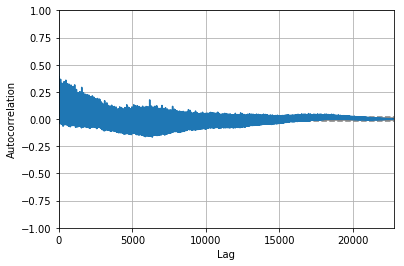

In [47]:
autocorrelation_plot(eur1h['Volatility'])

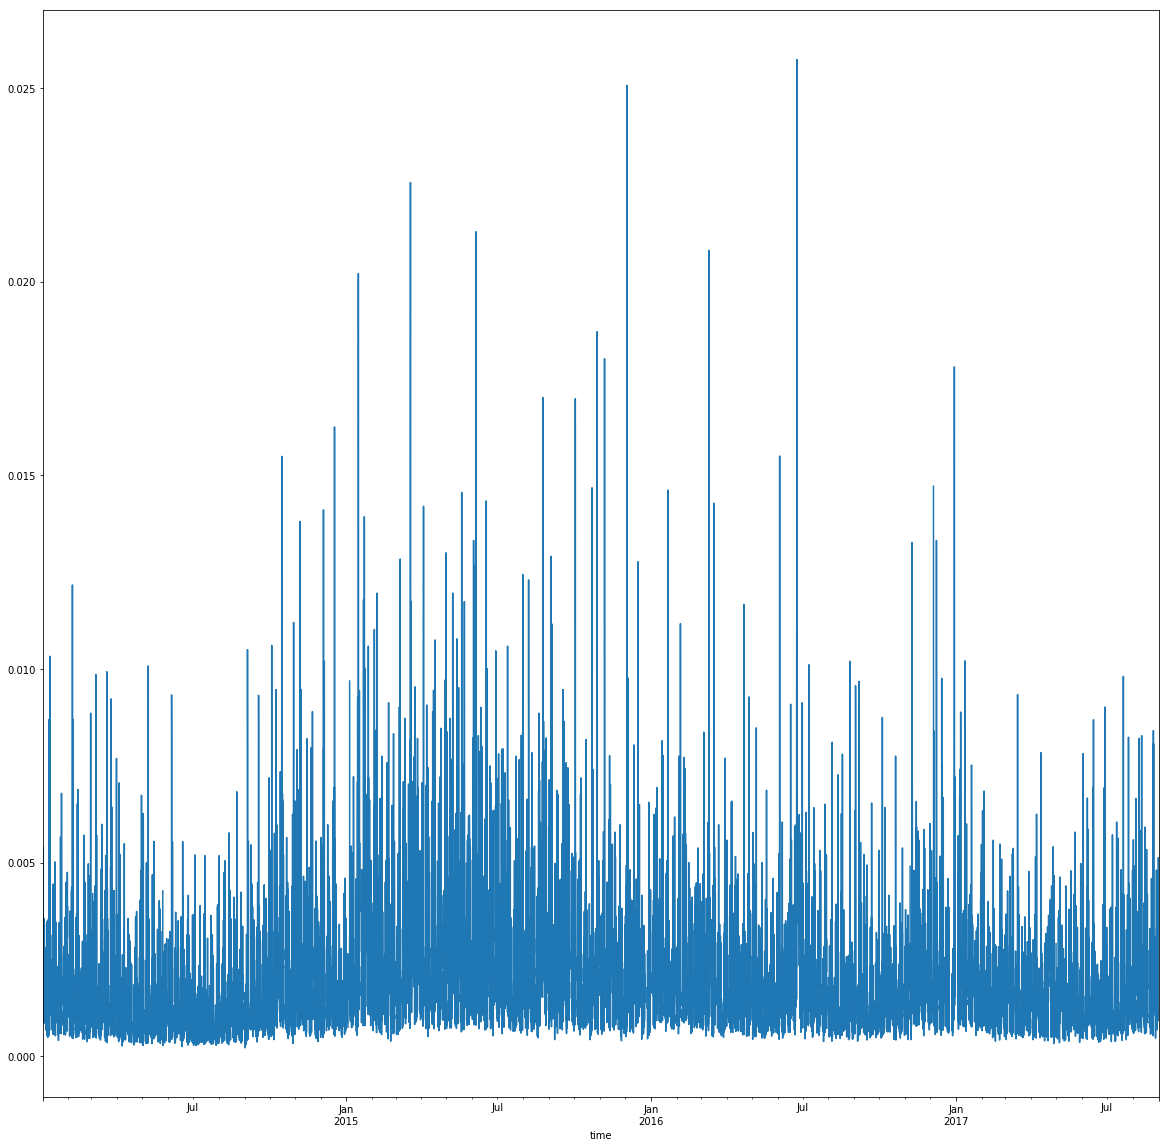

In [14]:
eur1h['Volatility'].plot(figsize=(20,20)) # Stationary

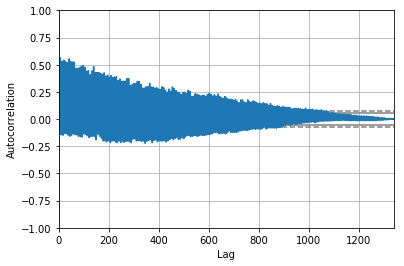

In [39]:
autocorrelation_plot(eur1d['Volatility'])

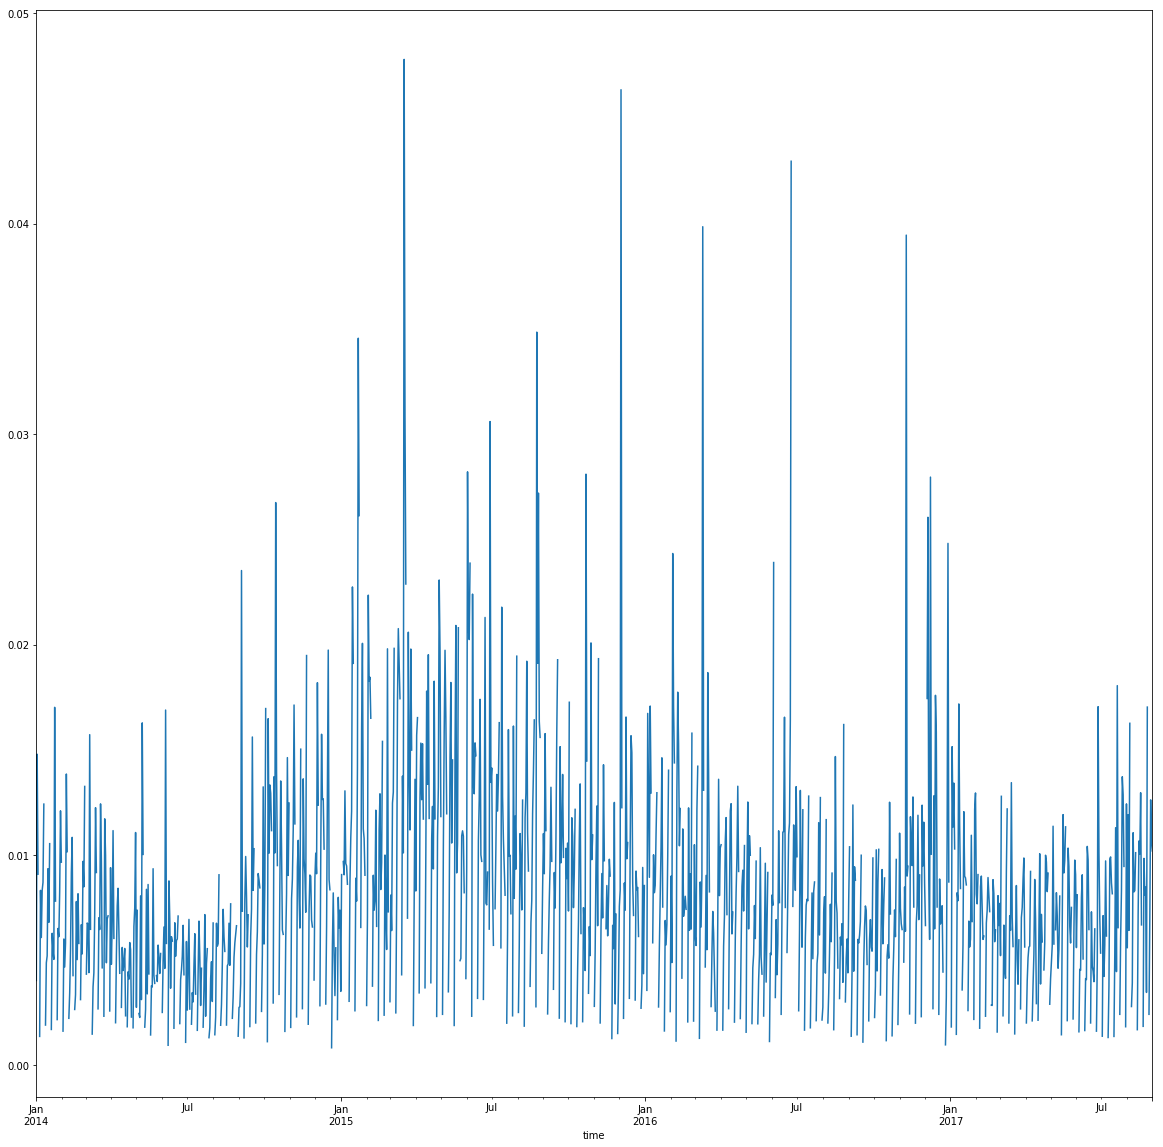

In [15]:
eur1d['Volatility'].plot(figsize=(20,20)) # Stationary

In [71]:
print('Autocorrelation 1: ', eur1h['Volatility'].autocorr(1)) # Good autocorrelation?
print('Autocorrelation 2: ', eur1h['Volatility'].autocorr(2))
print('Autocorrelation 3: ', eur1h['Volatility'].autocorr(3))
print('Autocorrelation 23: ', eur1h['Volatility'].autocorr(23))
print('Autocorrelation 24: ', eur1h['Volatility'].autocorr(24))
print('Autocorrelation 25: ', eur1h['Volatility'].autocorr(25))

Autocorrelation 1:  0.538628771029
Autocorrelation 2:  0.393919176653
Autocorrelation 3:  0.303194025612
Autocorrelation 23:  0.349962837987
Autocorrelation 24:  0.405165153852
Autocorrelation 25:  0.331485119341


In [17]:
# Weak autocorrelation

print('Autocorrelation 1: ', eur1d['Volatility'].autocorr(1))
print('Autocorrelation 2: ', eur1d['Volatility'].autocorr(2))
print('Autocorrelation 3: ', eur1d['Volatility'].autocorr(3))
print('Autocorrelation 20: ', eur1d['Volatility'].autocorr(20))
print('Autocorrelation 21: ', eur1d['Volatility'].autocorr(21))
print('Autocorrelation 22: ', eur1d['Volatility'].autocorr(22))

Autocorrelation 1:  0.366562017192
Autocorrelation 2:  0.118949770682
Autocorrelation 3:  0.0158894236437
Autocorrelation 20:  0.255529062701
Autocorrelation 21:  0.404542275207
Autocorrelation 22:  0.185176593091


# Split data in a training and test set - using 80%


In [112]:
n = len(eur1h['Volatility'])

train = eur1h['Volatility'][:int(.80*n)]
test = eur1h['Volatility'][int(.80*n):]

train.dropna(inplace=True)
test.dropna(inplace=True)

print ('Length of n:', n)
print ('Length of train:', len(train))
print ('Length of test:', len(test))

Length of n: 22789
Length of train: 18231
Length of test: 4558


In [24]:
n1 = len(eur1d['Volatility'])

train1 = eur1d['Volatility'][:int(.80*n1)]
test1 = eur1d['Volatility'][int(.80*n1):]

print ('Length of n1:', n1)
print ('Length of train1:', len(train1))
print ('Length of test1:', len(test1))

train1.fillna(0, inplace=True)
test1.fillna(0, inplace=True)

Length of n1: 1339
Length of train1: 1071
Length of test1: 268


In [25]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

# Daily First

In [26]:
model = sm.tsa.ARIMA(train1, (2, 0, 2)).fit()

predictions = model.predict(
    '2016-12-07',
    '2017-08-31',
    dynamic=True, 
)

print("Mean absolute error: ", mean_absolute_error(test1, predictions))

model.summary()

# Last table is broken...
# {AR.1 Real: 0.6238, AR.1 Imaginary: -0.7824j, AR.1 Modulus : 1.0006, AR.1 Frequency : -0.1429 } etc....

Mean absolute error:  0.00298014042255


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Volatility   No. Observations:                 1071
Model:                     ARMA(2, 2)   Log Likelihood                4117.141
Method:                       css-mle   S.D. of innovations              0.005
Date:                Fri, 13 Oct 2017   AIC                          -8222.282
Time:                        19:17:21   BIC                          -8192.424
Sample:                    01-01-2014   HQIC                         -8210.972
                         - 12-06-2016                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0074      0.000     47.894      0.000       0.007       0.008
ar.L1.Volatility     1.2461      0.001    964.804      0.000       1.244       1.249
ar.L2.Volatility    -0.9988      0.001   -937.994      0.000      -1.001      -0.997
ma.L1.Volatility    -1.2394      0.010   -127.653      0.000      -1.258      -1.220
ma.L2.Volatility     0.9746      0.007    145.647      0.000       0.961       0.988
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6238           -0.7824j            1.0006           -0.1429
AR.2            0.6238           +0.7824j            1.0006            0.1429
MA.1            0.6359           -0.7885j            1.0130           -0.1420
MA.2            0.6359           +0.7885j            1.0130            0.1420
-----------------------------------------------------------------------------
"""

In [49]:
model = sm.tsa.ARIMA(train1, (1, 0, 1)).fit()

predictions = model.predict(
    '2016-12-07',
    '2017-08-31',
    dynamic=True, 
)

print("Mean absolute error: ", mean_absolute_error(test1, predictions))

model.summary()

Mean absolute error:  0.00364050512188


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Volatility   No. Observations:                 1071
Model:                     ARMA(1, 1)   Log Likelihood                3999.701
Method:                       css-mle   S.D. of innovations              0.006
Date:                Fri, 13 Oct 2017   AIC                          -7991.402
Time:                        19:33:10   BIC                          -7971.496
Sample:                    01-01-2014   HQIC                         -7983.861
                         - 12-06-2016                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0074      0.000     30.340      0.000       0.007       0.008
ar.L1.Volatility     0.0513      0.075      0.685      0.493      -0.095       0.198
ma.L1.Volatility     0.3088      0.070      4.429      0.000       0.172       0.445
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           19.4808           +0.0000j           19.4808            0.0000
MA.1           -3.2380           +0.0000j            3.2380            0.5000
-----------------------------------------------------------------------------
"""

In [54]:
model = sm.tsa.ARIMA(train1, (2, 1, 2)).fit()

predictions = model.predict(
    '2016-12-07',
    '2017-08-31',
    dynamic=True, 
)

print("Mean absolute error: ", mean_absolute_error(test1, predictions))

model.summary()

Mean absolute error:  0.00621080515262


/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Volatility   No. Observations:                 1070
Model:                 ARIMA(2, 1, 2)   Log Likelihood                4042.661
Method:                       css-mle   S.D. of innovations              0.006
Date:                Fri, 13 Oct 2017   AIC                          -8073.321
Time:                        19:34:10   BIC                          -8043.469
Sample:                    01-02-2014   HQIC                         -8062.012
                         - 12-06-2016                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.643e-06   9.43e-06      0.280      0.779   -1.58e-05    2.11e-05
ar.L1.D.Volatility     0.7876      0.052     15.058      0.000       0.685       0.890
ar.L2.D.Volatility    -0.3796      0.034    -11.089      0.000      -0.447      -0.313
ma.L1.D.Volatility    -1.4839      0.048    -30.856      0.000      -1.578      -1.390
ma.L2.D.Volatility     0.5164      0.050     10.379      0.000       0.419       0.614
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0374           -1.2482j            1.6231           -0.1396
AR.2            1.0374           +1.2482j            1.6231            0.1396
MA.1            1.0793           +0.0000j            1.0793            0.0000
MA.2            1.7941           +0.0000j            1.7941            0.0000
-----------------------------------------------------------------------------
"""

In [125]:
model = sm.tsa.ARIMA(train1, (1, 1, 1)).fit()

predictions = model.predict(
    '2016-12-07',
    '2017-08-31',
    dynamic=True, 
)

print("Mean absolute error: ", mean_absolute_error(test1, predictions))

model.summary()

Mean absolute error:  0.00620233810592


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Volatility   No. Observations:                 1070
Model:                 ARIMA(1, 1, 1)   Log Likelihood                4002.799
Method:                       css-mle   S.D. of innovations              0.006
Date:                Fri, 13 Oct 2017   AIC                          -7997.599
Time:                        20:25:25   BIC                          -7977.697
Sample:                    01-02-2014   HQIC                         -7990.059
                         - 12-06-2016                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.449e-06   4.84e-06      0.299      0.765   -8.04e-06    1.09e-05
ar.L1.D.Volatility     0.2544      0.030      8.416      0.000       0.195       0.314
ma.L1.D.Volatility    -0.9804      0.005   -187.187      0.000      -0.991      -0.970
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.9305           +0.0000j            3.9305            0.0000
MA.1            1.0200           +0.0000j            1.0200            0.0000
-----------------------------------------------------------------------------
"""

# Hourly

In [117]:
model = sm.tsa.ARIMA(train, (2, 0, 2)).fit()

predictions = model.predict(
    18230,
    22787,
    dynamic=True, 
)

print("Mean absolute error: ", mean_absolute_error(test, predictions))

model.summary()

Mean absolute error:  0.000788311747988


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Volatility   No. Observations:                18231
Model:                     ARMA(2, 2)   Log Likelihood               96170.289
Method:                       css-mle   S.D. of innovations              0.001
Date:                Fri, 13 Oct 2017   AIC                        -192328.578
Time:                        20:24:21   BIC                        -192281.713
Sample:                    01-01-2014   HQIC                       -192313.176
                         - 12-07-2016                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0019   2.91e-05     65.325      0.000       0.002       0.002
ar.L1.Volatility     1.0446      0.071     14.746      0.000       0.906       1.183
ar.L2.Volatility    -0.1726      0.057     -3.048      0.002      -0.284      -0.062
ma.L1.Volatility    -0.5995      0.071     -8.465      0.000      -0.738      -0.461
ma.L2.Volatility     0.0061      0.029      0.211      0.833      -0.051       0.063
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1921           +0.0000j            1.1921            0.0000
AR.2            4.8605           +0.0000j            4.8605            0.0000
MA.1            1.6973           +0.0000j            1.6973            0.0000
MA.2           96.5652           +0.0000j           96.5652            0.0000
-----------------------------------------------------------------------------
"""

In [85]:
model = sm.tsa.ARIMA(train, (1, 0, 1)).fit()

predictions = model.predict(
    18230,
    22787,
    dynamic=True, 
)

print("Mean absolute error: ", mean_absolute_error(test, predictions))

model.summary()

Mean absolute error:  0.000788718736526


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Volatility   No. Observations:                18239
Model:                     ARMA(1, 1)   Log Likelihood               96179.375
Method:                       css-mle   S.D. of innovations              0.001
Date:                Fri, 13 Oct 2017   AIC                        -192350.749
Time:                        19:47:08   BIC                        -192319.504
Sample:                    01-01-2014   HQIC                       -192340.481
                         - 12-07-2016                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0019   2.67e-05     71.386      0.000       0.002       0.002
ar.L1.Volatility     0.7732      0.009     87.186      0.000       0.756       0.791
ma.L1.Volatility    -0.3420      0.014    -24.843      0.000      -0.369      -0.315
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2932           +0.0000j            1.2932            0.0000
MA.1            2.9240           +0.0000j            2.9240            0.0000
-----------------------------------------------------------------------------
"""

In [86]:
model = sm.tsa.ARIMA(train, (2, 1, 2)).fit()

predictions = model.predict(
    18230,
    22787,
    dynamic=True, 
)

print("Mean absolute error: ", mean_absolute_error(test, predictions))

model.summary()

/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Mean absolute error:  0.00161674483349


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Volatility   No. Observations:                18238
Model:                 ARIMA(2, 1, 2)   Log Likelihood               96146.116
Method:                       css-mle   S.D. of innovations              0.001
Date:                Fri, 13 Oct 2017   AIC                        -192280.231
Time:                        19:47:17   BIC                        -192233.364
Sample:                    01-01-2014   HQIC                       -192264.829
                         - 12-07-2016                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.262e-08   1.14e-06     -0.029      0.977   -2.27e-06     2.2e-06
ar.L1.D.Volatility     0.4198      0.021     19.671      0.000       0.378       0.462
ar.L2.D.Volatility     0.0307      0.016      1.902      0.057      -0.001       0.062
ma.L1.D.Volatility    -0.9396      0.014    -66.980      0.000      -0.967      -0.912
ma.L2.D.Volatility     0.0077      0.024      0.316      0.752      -0.040       0.055
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.0693           +0.0000j            2.0693            0.0000
AR.2          -15.7572           +0.0000j           15.7572            0.5000
MA.1            1.0737           +0.0000j            1.0737            0.0000
MA.2          121.6226           +0.0000j          121.6226            0.0000
-----------------------------------------------------------------------------
"""

In [87]:
model = sm.tsa.ARIMA(train, (1, 1, 1)).fit()

predictions = model.predict(
    18230,
    22787,
    dynamic=True, 
)

print("Mean absolute error: ", mean_absolute_error(test, predictions))

model.summary()

Mean absolute error:  0.00161656239075


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Volatility   No. Observations:                18238
Model:                 ARIMA(1, 1, 1)   Log Likelihood               96266.306
Method:                       css-mle   S.D. of innovations              0.001
Date:                Fri, 13 Oct 2017   AIC                        -192524.612
Time:                        19:47:30   BIC                        -192493.367
Sample:                    01-01-2014   HQIC                       -192514.344
                         - 12-07-2016                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.543e-08   2.36e-07      0.065      0.948   -4.48e-07    4.79e-07
ar.L1.D.Volatility     0.4634      0.007     66.720      0.000       0.450       0.477
ma.L1.D.Volatility    -0.9862      0.002   -602.285      0.000      -0.989      -0.983
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.1579           +0.0000j            2.1579            0.0000
MA.1            1.0140           +0.0000j            1.0140            0.0000
-----------------------------------------------------------------------------
"""

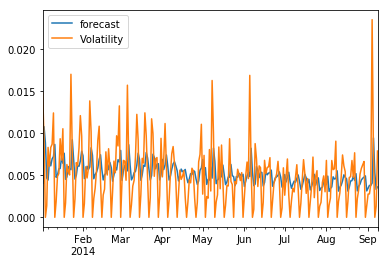

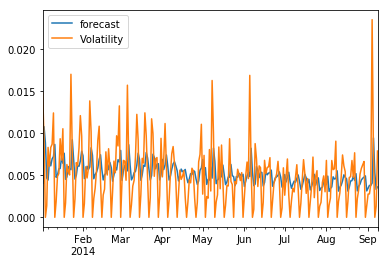

In [127]:
model.plot_predict(1, 250)

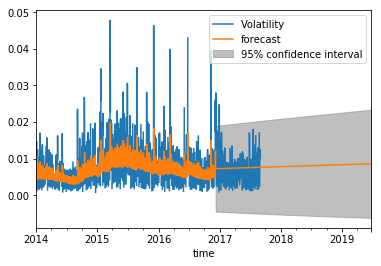

In [103]:
fig, ax = plt.subplots()
ax = eur1d['Volatility'].plot(ax=ax)

fig = model.plot_predict(1, 2000, ax=ax, plot_insample=False)

In [136]:
#Economic Indicators to improve Accuracy
EconIndic = pd.read_csv("/Users/john/Desktop/Econ Indicators.csv")
EconIndic.drop('Unnamed: 0', axis=1, inplace=True)
EconIndic.head(30)

,DateTime,EUIR,EUCONF,USIR,FEDCONF,USGDP,EUGDP,USCPI,EUCPI,NFP,EUUR,USR,USCC,USADP,USISM,GPMI,GZEW,GIFO,GUC
0,2014-01-02 04:53:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2014-01-02 11:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2014-01-07 04:55:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2014-01-07 06:00:00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2014-01-08 06:00:00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,2014-01-08 09:15:00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,2014-01-09 08:45:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2014-01-10 06:00:00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,2014-01-10 09:30:00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,2014-01-14 09:30:00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# LSTM